<a href="https://colab.research.google.com/github/jaiswar12344/mlproject/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [33]:
# Install tensorflow-docs package
!pip install tensorflow-docs

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 1.4 MB/s eta 0:00:00


In [35]:
dataset = pd.read_csv('insurance.csv')
len(dataset)

1338

In [36]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [37]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [38]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

In [39]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [40]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86
5,31.0,0.0,25.7,0.0,1.0,1.0,3756.62


In [41]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

0    16884.92
2     4449.46
3    21984.47
4     3866.86
5     3756.62
Name: expenses, dtype: float64

In [42]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

563     9058.73
800     7046.72
492     2196.47
933     7348.14
627    11326.71
Name: expenses, dtype: float64

In [43]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
563,50,1,44.8,1,1,1
800,42,0,26.2,1,1,1
492,18,0,25.1,0,1,3
933,45,0,35.3,0,1,0
627,33,1,42.5,1,1,1


In [44]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [45]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198 (796.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 13 (56.00 Byte)
________________

In [46]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

9/9 - 0s - loss: 3828.1467 - mae: 3828.1467 - mse: 43213744.0000 - 145ms/epoch - 16ms/step
Testing set Mean Abs Error: 3828.15 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 [==============================] - 0s 7ms/step


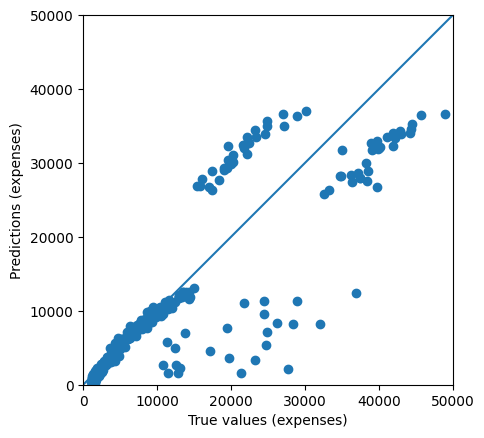

In [47]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)